#### CPU core residency analysis during inferring LLM cluster

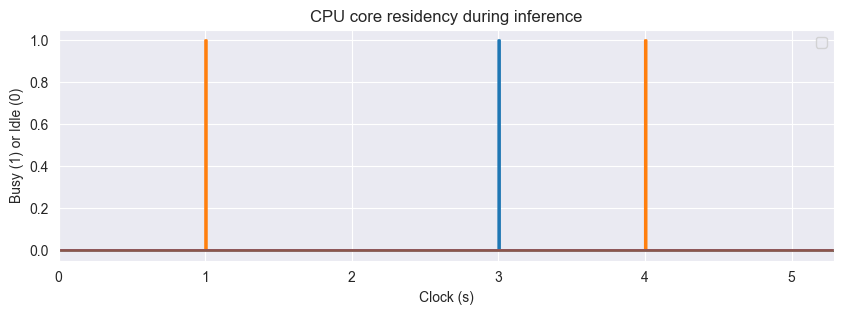

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data_loc = '../results/0/splitwise_27_13/test_trace/40_0/bloom-176b/mixed_pool'

df = pd.read_csv(data_loc + '/cpu_usage/cpu_usage_0.csv')
# replace all True to 1 and False to 0
df = df.replace({True: 1, False: 0})

# Read the CSV file
df_sim = pd.read_csv(data_loc + '/simulator.csv')

# Filter the rows where the event is 'end'
end_event = df_sim[df_sim['event'] == 'end']

# Extract the time of the 'end' event
duration = end_event['time'].values[0]

# Create a complete range of clock values from 0 to duration
clock_range = pd.DataFrame({'clock': np.arange(0, duration, step=0.01)})

# Merge the clock range with the existing data
df = pd.merge(clock_range, df, on='clock', how='left')

# Fill missing values with 0 and forward fill the core values
df.fillna(0, inplace=True)
df.ffill(inplace=True)

plt.figure(figsize=(10, 3))

# Plot each core column as a step function
for column in df.columns:
    if column.startswith('core'):
        plt.step(df['clock'], df[column], where='post', label=f'CPU {column} residency')

plt.title('CPU core residency during inference')
plt.xlabel('Clock (s)')
plt.ylabel('Busy (1) or Idle (0)')
plt.xlim(0, duration)  # Set x-axis limits
plt.legend('')
plt.show()